Preguntas:
- Se debe normalizar?
- country se deberia volver numerico?
- reserved_room_type, assigned_room_type (fusionar)
- codificar categoricas con one hot o label?
- eliminar columna company


# Reto 1

## Pre-procesamiento de Datos:

### Manejo de Datos Faltantes:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform




In [2]:
file_name = 'datasets/hotel_bookings.csv'
df = pd.read_csv(file_name)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape

(119390, 32)

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


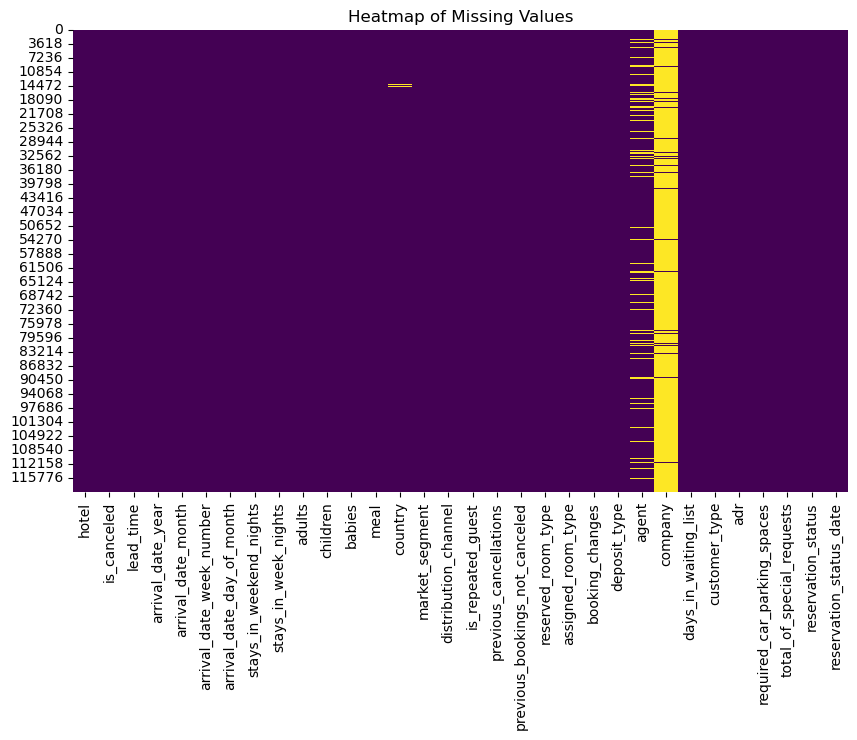

In [5]:
# Create a boolean mask where True indicates NaN values
null_mask = df.isnull()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(null_mask, cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

In [6]:
# Calculate the number of missing values
missing_counts = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = df.isnull().mean() * 100

# Create a DataFrame to hold both counts and percentages
missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage': missing_percentage
})

# Filter to show only columns with more than 1% missing values
missing_summary_filtered = missing_summary[missing_summary['Percentage'] > 0]

# Calculate totals
total_missing = missing_summary['Missing Values'].sum()
total_percentage = 0

# Add totals to the filtered summary
missing_summary_filtered.loc['Total'] = [total_missing,0]

# Print the summary table
print(missing_summary_filtered)


          Missing Values  Percentage
children               4    0.003350
country              488    0.408744
agent              16340   13.686238
company           112593   94.306893
Total             129425    0.000000


/var/folders/4l/3kt45bp907g_zjx6qwp8r7v00000gn/T/ipykernel_12317/3588148369.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_summary_filtered.loc['Total'] = [total_missing,0]


En el mapa de calor se puede evidenciar que las columnas agent y company estan relacionadas. Pues las filas que tienen un valor para agent no tienen un valor para company y viceversa. 

In [7]:
# Filter rows where agent has a value and company has no value
subset = df[(df['agent'].notnull()) & (df['company'].isnull())]
print(f"Number of rows where agent has a value and company has no value: {len(subset)}")

# Filter rows where agent has no value and company has a value
subset2 = df[(df['agent'].isnull()) & (df['company'].notnull())]
print(f"Number of rows where agent has no value and company has a value: {len(subset2)}")

# Filter rows where agent has value and company also has value
subset3 = df[(df['agent'].notnull()) & (df['company'].notnull())]
print(f"Number of rows where agent has value and company also has value: {len(subset3)}")

# Filter rows where agent has no value and company also has no value
subset4 = df[(df['agent'].isnull()) & (df['company'].isnull())]
print(f"Number of rows where agent has no value and company also has no value: {len(subset4)}")




Number of rows where agent has a value and company has no value: 102833
Number of rows where agent has no value and company has a value: 6580
Number of rows where agent has value and company also has value: 217
Number of rows where agent has no value and company also has no value: 9760


## Imputación de datos Faltantes

In [8]:
df = df.drop('company', axis=1)

In [9]:
missing_numeric = ['children','agent']
missing_categorical = ['country']

# Step 2: Impute median for numeric columns
median_imputer = SimpleImputer(strategy='median')
df[missing_numeric] = median_imputer.fit_transform(df[missing_numeric])

In [10]:
# Step 3: Impute mode for categorical columns
mode_imputer = SimpleImputer(strategy='most_frequent')
df[missing_categorical] = mode_imputer.fit_transform(df[missing_categorical])

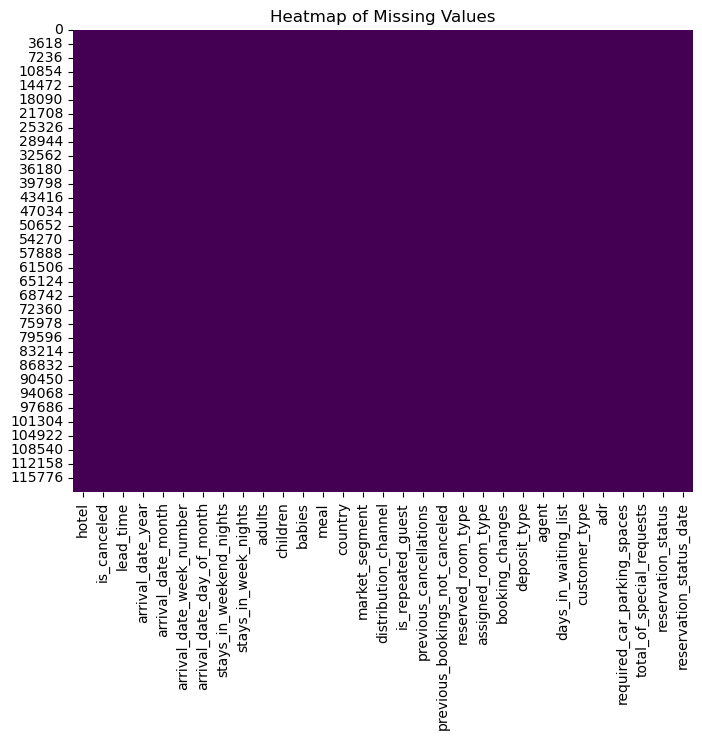

In [11]:
# Create a boolean mask where True indicates NaN values
null_mask = df.isnull()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(null_mask, cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

### Identificar Atípicos:

#### Rango Intercuartil:

                           Columna  Datos Atípicos
0                        lead_time            3005
1          stays_in_weekend_nights             265
2             stays_in_week_nights            3354
3                           adults           29710
4                         children            8590
5                           babies             917
6           previous_cancellations            6484
7   previous_bookings_not_canceled            3620
8                  booking_changes           18076
9             days_in_waiting_list            3698
10                             adr            3793
11     required_car_parking_spaces            7416


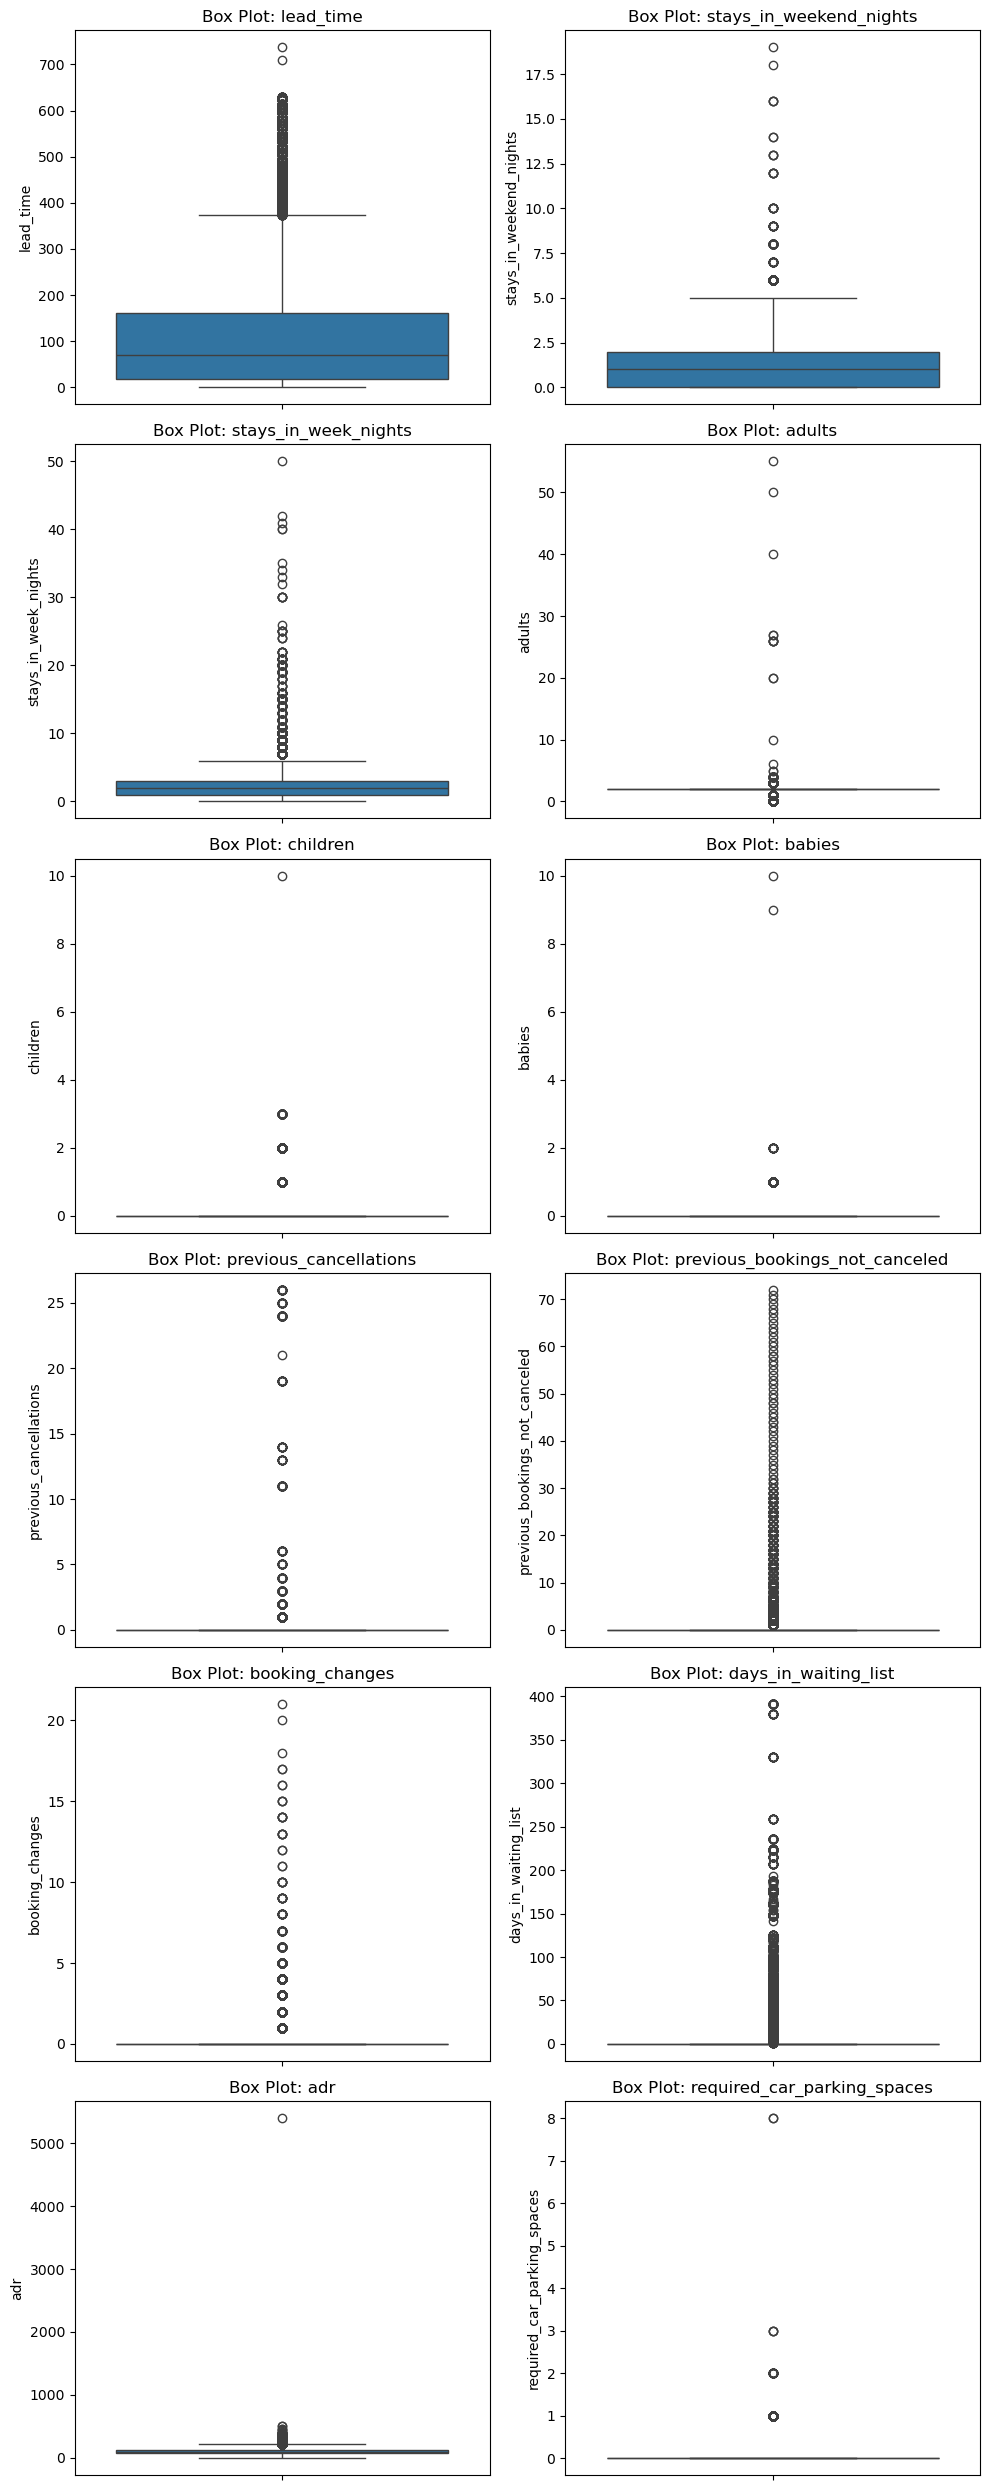

In [12]:
# Define the columns of interest for outlier detection
outlier_cols = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces']

# Create a function to detect outliers using the IQR method
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    return outliers

# Detect outliers in the specified columns
outliers_detected = detect_outliers_iqr(df, outlier_cols)
# Create a DataFrame to display the outlier results in a table format
outlier_df = pd.DataFrame(list(outliers_detected.items()), columns=['Columna', 'Datos Atípicos'])
print(outlier_df)

# Columns for box plot
col_boxPlot = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces']

# Create subplots - 2 rows, 5 columns for example (5 plots per row)
fig, axes = plt.subplots(6, 2, figsize=(10, 25))  # Adjust the layout as needed
axes = axes.flatten()  # Flatten the axes array to iterate over easily

# Create individual box plots for each column
for i, col in enumerate(col_boxPlot):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot: {col}')

# Adjust layout
plt.tight_layout()
plt.show()

### Normalización de Rango:

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Columns you want to normalize
columns_to_normalize = ['lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes','days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
        ]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Create a new DataFrame to hold the normalized values
normalized_df = df.copy()
normalized_df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the new DataFrame
print(normalized_df)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0   0.464043               2015   
1       Resort Hotel            0   1.000000               2015   
2       Resort Hotel            0   0.009498               2015   
3       Resort Hotel            0   0.017639               2015   
4       Resort Hotel            0   0.018996               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0   0.031208               2017   
119386    City Hotel            0   0.138399               2017   
119387    City Hotel            0   0.046133               2017   
119388    City Hotel            0   0.147897               2017   
119389    City Hotel            0   0.278155               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

### Codificación de Variables Categóricas:

In [15]:
# List of columns to one-hot encode 
# (Dejamos country afuera mientras)
col_encode_oneHot = ['hotel', 'meal','market_segment','distribution_channel','deposit_type','customer_type','reservation_status']
df_oneHot_encoded = pd.get_dummies(df, columns=col_encode_oneHot, dtype=int)


# Ordinal encode
# (Dejamos reserved_room_type, assigned_room_type afuera mientras miramos si se pueden fusionar)
# for arrival_date_month
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 
    'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 
    'November': 11, 'December': 12
}
df_oneHot_encoded['arrival_date_month'] = df_oneHot_encoded['arrival_date_month'].map(month_mapping)
df_encoded = df_oneHot_encoded
df_encoded.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,2015,7,27,1,0,0,2,0.0,...,1,0,0,0,0,1,0,0,1,0
1,0,737,2015,7,27,1,0,0,2,0.0,...,1,0,0,0,0,1,0,0,1,0
2,0,7,2015,7,27,1,0,1,1,0.0,...,1,0,0,0,0,1,0,0,1,0
3,0,13,2015,7,27,1,0,1,1,0.0,...,1,0,0,0,0,1,0,0,1,0
4,0,14,2015,7,27,1,0,2,2,0.0,...,1,0,0,0,0,1,0,0,1,0


## Procesamiento de Datos:

### Covarianza:

In [16]:
# Mientras preguntamos por esos datos
df_temporal = df_encoded.drop(columns=['country',"reserved_room_type", 'assigned_room_type', 'reservation_status_date'])
cov_matrix = df_temporal.cov()
print(cov_matrix)

                                is_canceled     lead_time  arrival_date_year  \
is_canceled                        0.233210     15.126964           0.005692   
lead_time                         15.126964  11419.721511           3.034866   
arrival_date_year                  0.005692      3.034866           0.500522   
arrival_date_month                 0.016450     43.405699          -1.153921   
arrival_date_week_number           0.053534    184.455853          -5.203069   
arrival_date_day_of_month         -0.025994      2.127750          -0.001373   
stays_in_weekend_nights           -0.000864      9.142389           0.015188   
stays_in_week_nights               0.022822     33.810687           0.041694   
adults                             0.016789      7.398401           0.012145   
children                           0.000969     -1.601962           0.015406   
babies                            -0.001529     -0.217774          -0.000909   
is_repeated_guest                 -0.007

### Correlación:

In [17]:
# Esperando lo mismo que covarianza
correlation_matrix = df_temporal.corr()
print(correlation_matrix)

                                is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.293123           0.016660   
lead_time                          0.293123   1.000000           0.040142   
arrival_date_year                  0.016660   0.040142           1.000000   
arrival_date_month                 0.011022   0.131424          -0.527739   
arrival_date_week_number           0.008148   0.126871          -0.540561   
arrival_date_day_of_month         -0.006130   0.002268          -0.000221   
stays_in_weekend_nights           -0.001791   0.085671           0.021497   
stays_in_week_nights               0.024765   0.165799           0.030883   
adults                             0.060017   0.119519           0.029635   
children                           0.005036  -0.037613           0.054636   
babies                            -0.032491  -0.020915          -0.013192   
is_repeated_guest                 -0.084793  -0.124410           0.010341   

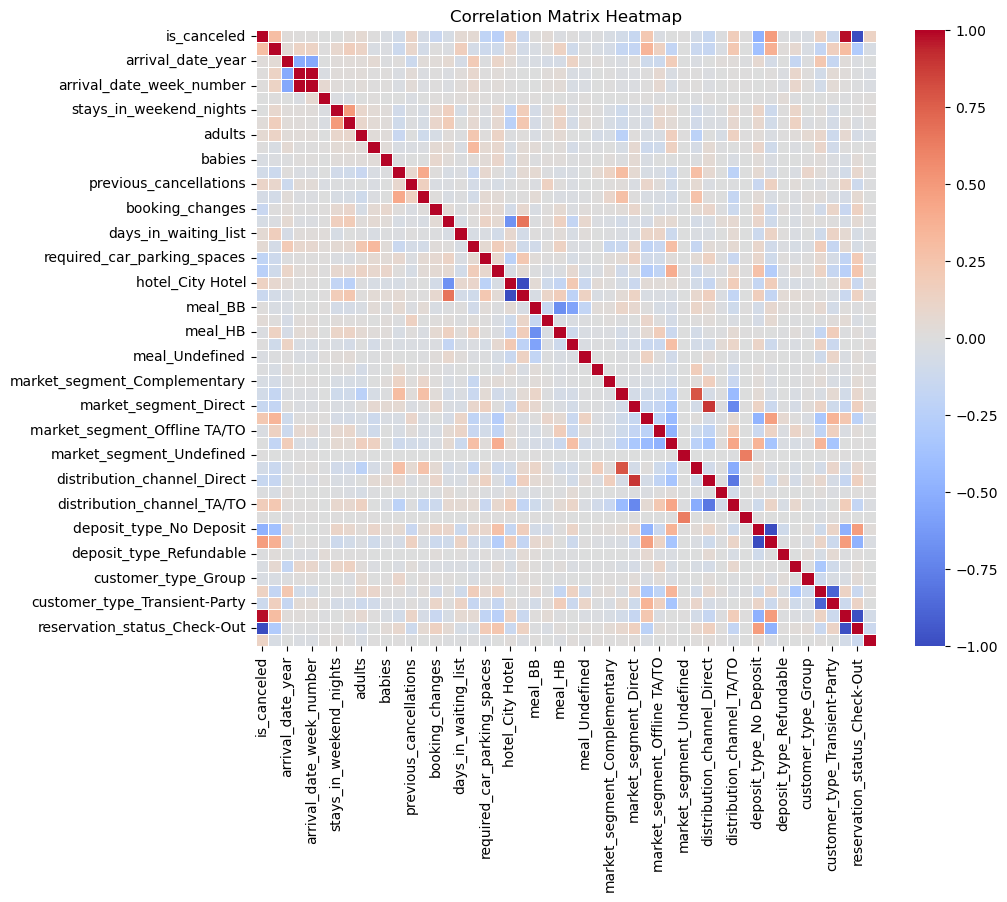

In [18]:
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

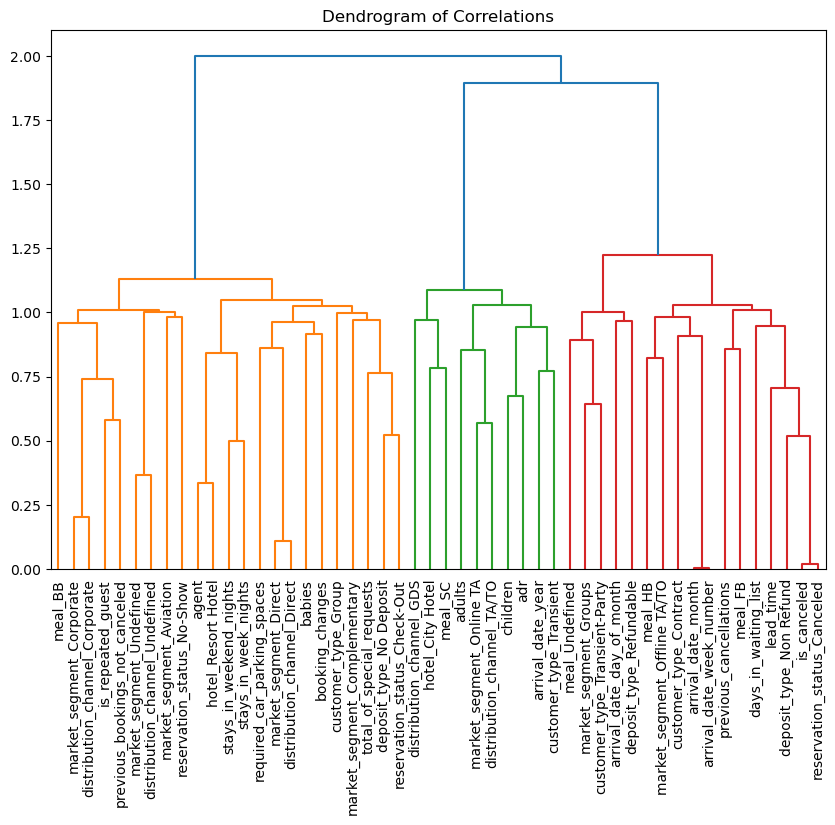

In [19]:
distance_matrix = 1 - correlation_matrix

# Perform hierarchical clustering using linkage
# Use 'complete' linkage method, but you can choose other methods like 'average' or 'single'
Z = linkage(squareform(distance_matrix), method='complete')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=correlation_matrix.columns, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram of Correlations')
plt.show()

In [20]:
# Assuming your DataFrame is 'df_encoded'

# Step 1: Find all non-numeric columns
non_numeric_columns = df_encoded.select_dtypes(exclude=['number']).columns

# Display the non-numeric columns
print("Non-numeric columns:")
print(non_numeric_columns)


Non-numeric columns:
Index(['country', 'reserved_room_type', 'assigned_room_type',
       'reservation_status_date'],
      dtype='object')


In [21]:
df_encoded['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [22]:

# Step 1: Compare the two columns
equal_values = df['reserved_room_type'] != df['assigned_room_type']

# Step 2: Get rows where the values are equal
equal_rows = df[equal_values]

# Step 3: Show the result
len(equal_rows)


14917

Analizar si afecta en satisfacción del cliente (repeated guest)

## PCA

inicialmente se realiza el pca solo con las columnas numericas (resultantes de la codificación)

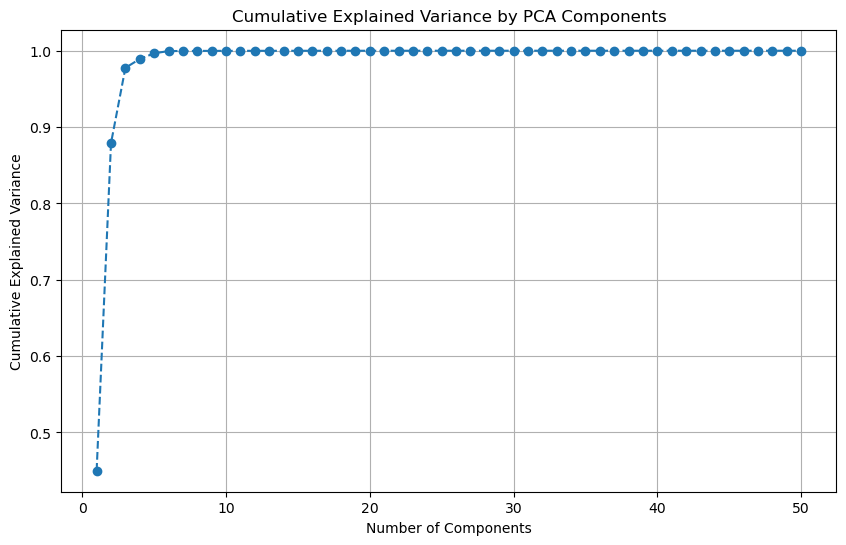

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Filter only numeric columns
df_encoded = df_encoded.select_dtypes(include=['number'])

# Step 2: Initialize PCA (you can define n_components or use the default which considers all components)
pca = PCA()

# Step 3: Fit PCA on the numeric columns and transform the data
pca_result = pca.fit_transform(df_encoded)

# Step 4: Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Step 5: Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()



In [24]:
# Step 3: Calculate the cumulative variance for the first 2 principal components
cumulative_variance_2_components = explained_variance[:2].sum()

# Step 4: Display the cumulative variance for the first 2 components
print(f"Cumulative explained variance for the first 2 principal components: {cumulative_variance_2_components:.4f}")

Cumulative explained variance for the first 2 principal components: 0.8789


Los primeros dos componentes principales explican en el 87% de la varianza

# Clustering

Las métricas usadas para validar los clusters son:
- Silhouette Score
- Davies-Bouldin Score
- 

In [25]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

## K-means

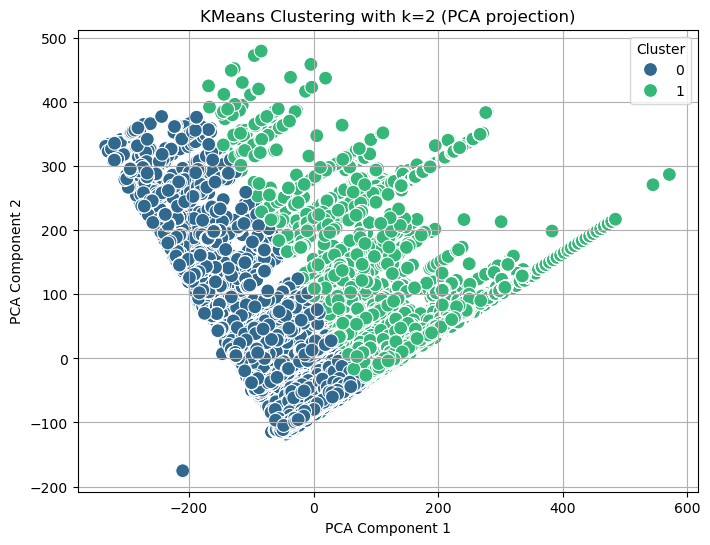

Métricas para k=2:
  Silhouette Score: 0.3687663456318529
  Davies-Bouldin Index: 1.2200019926456152


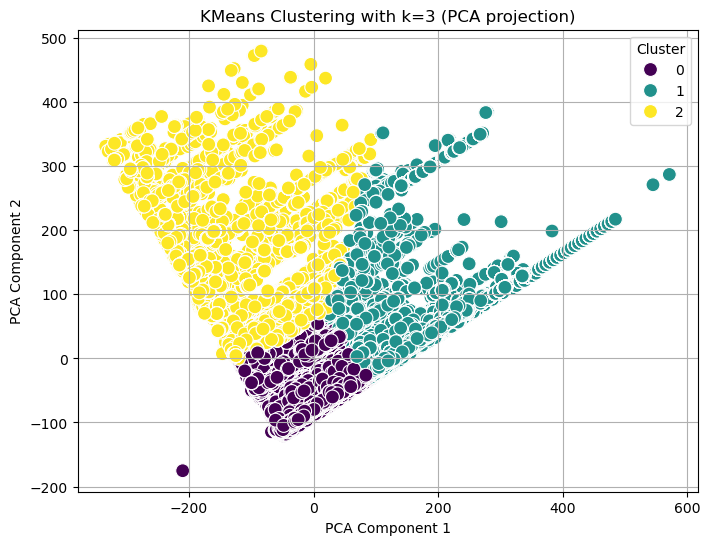

Métricas para k=3:
  Silhouette Score: 0.4933226574853561
  Davies-Bouldin Index: 0.7484106561139531


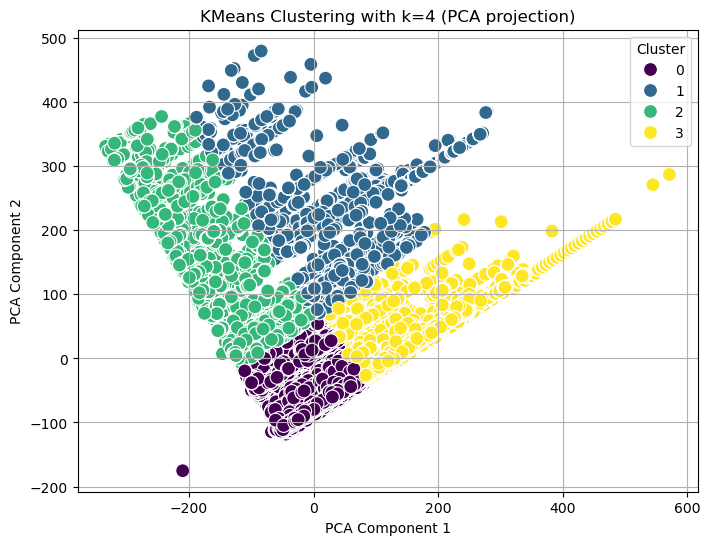

Métricas para k=4:
  Silhouette Score: 0.4788728647387329
  Davies-Bouldin Index: 0.8837533577812086


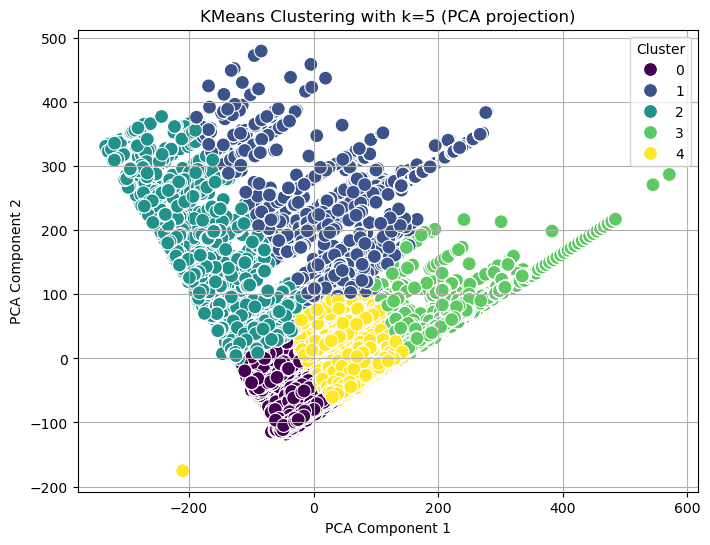

Métricas para k=5:
  Silhouette Score: 0.3973475320757035
  Davies-Bouldin Index: 0.9270733010132017


In [26]:
from sklearn.cluster import KMeans

k_values = [2,3,4,5]

for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=42)
    clusters = kmeans.fit_predict(pca_result)

    #Métricas
    silhouette_avg = silhouette_score(pca_result, clusters)
    db_index = davies_bouldin_score(pca_result, clusters)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis', s=100)
    plt.title(f'KMeans Clustering with k={k} (PCA projection)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

    print(f'Métricas para k={k}:')
    print(f'  Silhouette Score: {silhouette_avg}')
    print(f'  Davies-Bouldin Index: {db_index}')

## DBSCAN 
Para obtener el valor óptimo de *ε* que permita tener la mejor partición del conjunto de datos se usara la gráfica de codo, esta gráfica calcula las distancias de cada punto a su vecino más cercano y traza una gráfica de la distancia del punto al vecimo k-ésimo más cercano. 

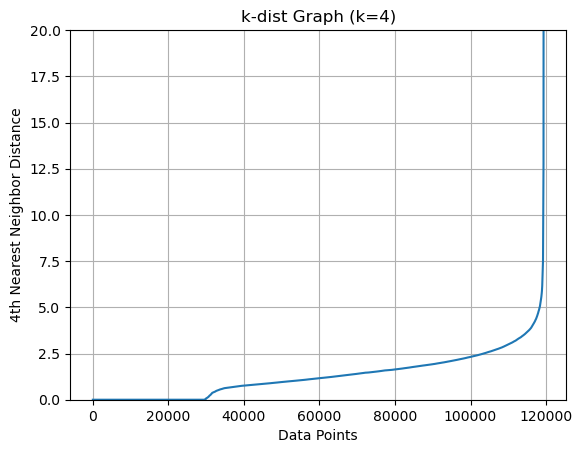

In [27]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_result)

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, 3], axis=0)
plt.plot(distances)
plt.title('k-dist Graph (k=4)')
plt.xlabel('Data Points')
plt.ylabel('4th Nearest Neighbor Distance')
plt.ylim(0,20)
plt.grid(True)
plt.show()

El valor de eps corresponde al punto en el que la curva tiene un cambio más drástico, el cuál está indicado por el codo. Esta curvatura indica que la mayoría de los puntos tienen una distancia al 4th vecino más cercano de entre 0 y 3, a partir de un punto cercano a los 100000 datos la distancia empieza a subir rápidamente.

A partir de la gráfica se determina que un buen valor para eps esta entre $4$ y $5$.

En cuanto a los min_points se uso la regla empírica min_points = 2 * n, donde n es la cantidad de dimensiones

Para eps=3 con min_points=64, el número de clusters encontrados (excluyendo ruido) es: 49
Silhouette Scorre para eps=3 y min_points=64:-0.695412223242808
Davies-Bouldin Index para eps=3 y min_points=64: 1.3654558059507835


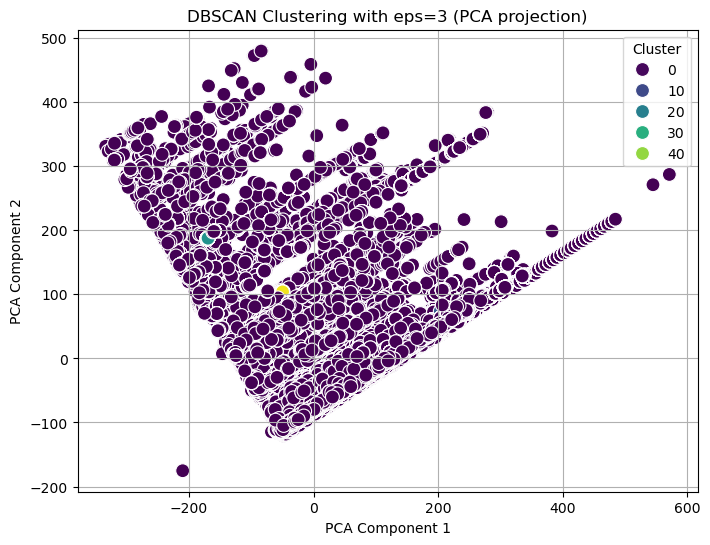

Para eps=3.5 con min_points=64, el número de clusters encontrados (excluyendo ruido) es: 53
Silhouette Scorre para eps=3.5 y min_points=64:-0.6877199535626713
Davies-Bouldin Index para eps=3.5 y min_points=64: 1.3247997382213905


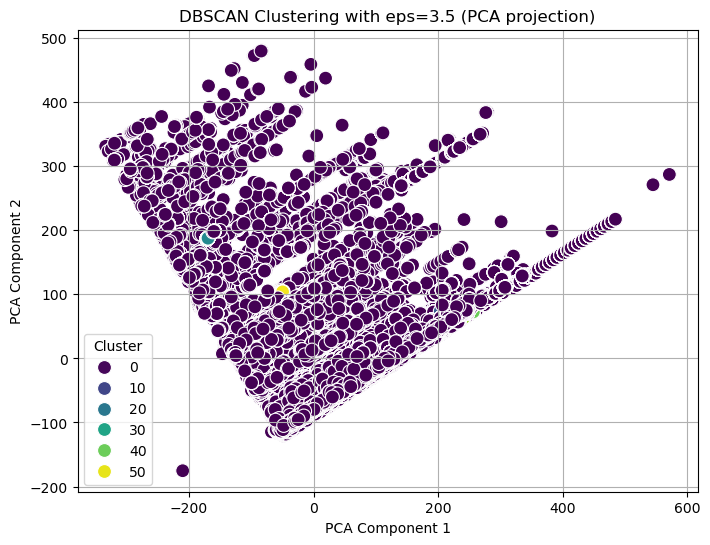

Para eps=4 con min_points=64, el número de clusters encontrados (excluyendo ruido) es: 52
Silhouette Scorre para eps=4 y min_points=64:-0.683879084289125
Davies-Bouldin Index para eps=4 y min_points=64: 1.345158207923309


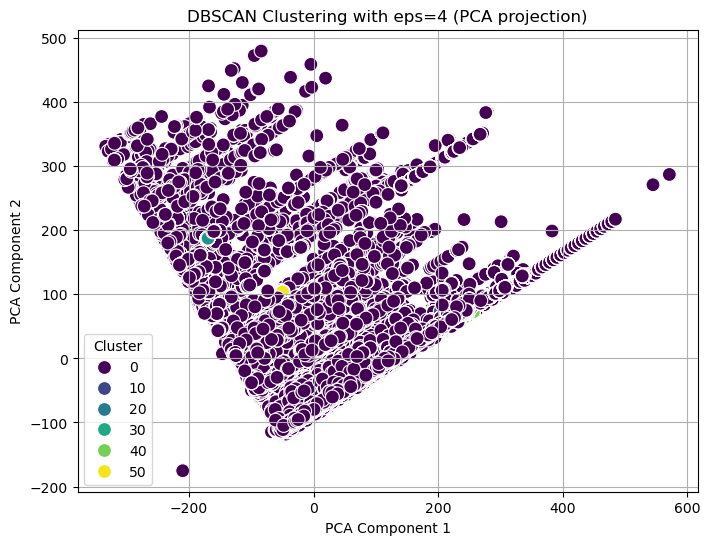

In [28]:
from sklearn.cluster import DBSCAN

eps_values= [3, 3.5, 4]
min_points = 64

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_points)
    clusters = dbscan.fit_predict(pca_result)

    # Clusters sin noise points
    num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    print(f'Para eps={eps} con min_points={min_points}, el número de clusters encontrados (excluyendo ruido) es: {num_clusters}')

    if num_clusters > 1: 
        silhouette_avg = silhouette_score(pca_result, clusters)
        db_index = davies_bouldin_score(pca_result, clusters)
        print(f"Silhouette Scorre para eps={eps} y min_points={min_points}:{silhouette_avg}")
        print(f"Davies-Bouldin Index para eps={eps} y min_points={min_points}: {db_index}")
    else: 
        print(f"Para eps={eps} y min_points={min_points}, no es posible calcular Silhouette o Davies-Bouldin (clusters insuficientes).")

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis', s=100)
    plt.title(f'DBSCAN Clustering with eps={eps} (PCA projection)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()